In [1]:
import json
import os

import pandas as pd

from collections import Counter

from matplotlib import pyplot as plt
import seaborn as sns

import squarify

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
sns.set_style('whitegrid')

In [3]:
# original data
path = '/Users/martina/Desktop/repos/GialloZafferano/Recipes/'  # path to recipes

d_rec = {}
for fn in os.listdir(path):
    rec = json.load(open(path + fn, 'r'))
    d_rec[fn.split('.')[0]] = {
        'ingredients': rec['ingredients'],
        'category': rec['category']
    }

In [4]:
len(d_rec)

6819

In [5]:
d_rec['fumetto_di_pesce']

{'ingredients': [['Pesce', '(solo lische di orata, branzino e merluzzo) 1 kg'],
  ['Cipolle', '100 g'],
  ['Sedano', '100 g'],
  ['Carote', '100 g'],
  ['Vino bianco', '150 g'],
  ['Acqua', '1 l'],
  ['Sale fino', 'q.b.'],
  ['Pepe nero in grani', '5'],
  ["Olio extravergine d'oliva", 'q.b.']],
 'category': 'Unknown'}

In [6]:
c = Counter([d_rec[k]['category'] for k in d_rec])

In [7]:
c.most_common()   # category counts

[('Dolci', 1747),
 ('Primi piatti', 1422),
 ('Antipasti', 905),
 ('Secondi piatti', 864),
 (None, 700),
 ('Lievitati', 313),
 ('Piatti Unici', 300),
 ('Contorni', 169),
 ('Torte salate', 109),
 ('Salse e Sughi', 98),
 ('Bevande', 74),
 ('Marmellate e Conserve', 61),
 ('Insalate', 56),
 ('Unknown', 1)]

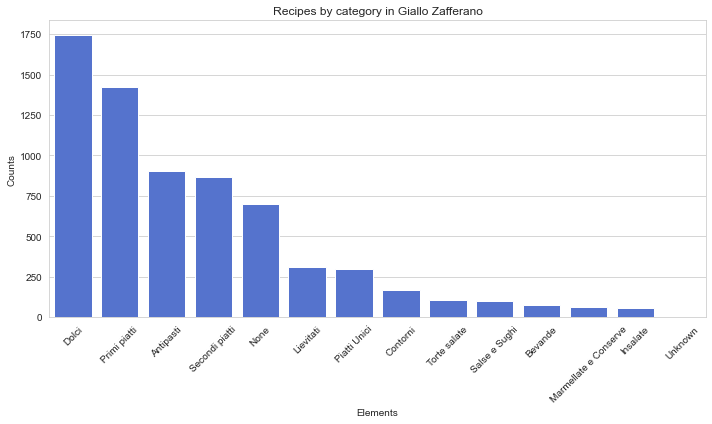

In [8]:
elements, counts = zip(*c.most_common())

elements = tuple(item if item else 'None' for item in elements)

df = pd.DataFrame({'Category': elements, 'Recipes': counts})

# Create bar plot using Seaborn
plt.figure(figsize=(10, 6));
sns.barplot(x='Category', y='Recipes', data=df, color='royalblue');
plt.xlabel('Elements');
plt.ylabel('Counts');
plt.title('Recipes by category in Giallo Zafferano');
plt.xticks(rotation=45);
plt.tight_layout();
plt.show();
#plt.savefig('cats.jpg', dpi=300)
#plt.close()

In [9]:
# all ingredients
l_ingrs_all = [d_rec[k]['ingredients'] for k in d_rec]

all_ingrs = []
for item in l_ingrs_all:
    for ingr in item:
        all_ingrs.append(ingr[0].lower())

len(set(all_ingrs))

1763

In [10]:
all_ingrs[:10]

["tonno sott'olio",
 'orzo perlato',
 'zafferano in pistilli',
 'asparagi',
 "olio extravergine d'oliva",
 'sale fino',
 'feta',
 'manzo',
 'sale grosso',
 'rosmarino']

In [11]:
# Primi piatti

l_titles = [k for k in d_rec if d_rec[k]['category']=='Primi piatti']
l_ingrs = [d_rec[k]['ingredients'] for k in d_rec 
           if d_rec[k]['category']=='Primi piatti'
          ]

all_ingrs = []
for item in l_ingrs:
    for ingr in item:
        all_ingrs.append(ingr[0].lower())

In [12]:
len(all_ingrs), len(set(all_ingrs))

(16834, 857)

In [13]:
d_rec['ravioli_di_castagne_e_salsiccia']

{'ingredients': [['Farina 00', '300 g'],
  ['Uova', '3'],
  ['Salsiccia', '250 g'],
  ['Castagne', '500 g'],
  ['Salvia', 'q.b.'],
  ['Grana Padano DOP', '50 g'],
  ['Uova', '1'],
  ['Burro', '50 g'],
  ['Vino rosso', 'novello 500 g'],
  ['Scalogno', '1'],
  ["Olio extravergine d'oliva", '10 g']],
 'category': 'Primi piatti'}

In [14]:
json.dump(list(set(all_ingrs)), open('ingrs_primipiatti.json', 'w'))

In [15]:
c = Counter(all_ingrs)

In [16]:
c.most_common()

[('sale fino', 1576),
 ("olio extravergine d'oliva", 1390),
 ('pepe nero', 1057),
 ('aglio', 646),
 ('burro', 418),
 ('farina 00', 340),
 ('acqua', 303),
 ('parmigiano reggiano dop', 293),
 ('uova', 282),
 ('basilico', 276),
 ('prezzemolo', 275),
 ('timo', 267),
 ('grana padano dop', 246),
 ('vino bianco', 241),
 ('carote', 237),
 ('brodo vegetale', 220),
 ('sedano', 191),
 ('scalogno', 175),
 ('noce moscata', 174),
 ('rosmarino', 172),
 ('latte intero', 168),
 ('peperoncino fresco', 152),
 ('patate', 136),
 ('pomodorini ciliegino', 134),
 ('riso carnaroli', 132),
 ('scorza di limone', 131),
 ('passata di pomodoro', 123),
 ('zucchine', 120),
 ('cipolle', 117),
 ('panna fresca liquida', 117),
 ('cipolle bianche', 109),
 ('porri', 105),
 ('salvia', 100),
 ('ricotta vaccina', 86),
 ('spaghetti', 83),
 ('salsiccia', 82),
 ('pinoli', 80),
 ('origano', 79),
 ('gamberi', 78),
 ('pisellini', 76),
 ('cipolle dorate', 75),
 ('alloro', 75),
 ('pecorino', 72),
 ('cipollotto fresco', 67),
 ('maggio

In [17]:
# ingredienti primi piatti per categoria

l_pasta = json.load(open('ingredienti_primipiatti/pasta.json'))
l_riso = json.load(open('ingredienti_primipiatti/riso.json'))
l_gnocchi = json.load(open('ingredienti_primipiatti/gnocchi.json'))
d_farine = json.load(open('ingredienti_primipiatti/farine_cereali_pane.json'))

l_formaggi = json.load(open('ingredienti_primipiatti/formaggi.json'))

l_erbe = json.load(open('ingredienti_primipiatti/erbe_aromatiche.json'))
l_spezie = json.load(open('ingredienti_primipiatti/spezie.json'))

d_verdure = json.load(open('ingredienti_primipiatti/verdure_frutta.json'))
d_carne = json.load(open('ingredienti_primipiatti/carne.json'))['Carne']
d_pesce = json.load(open('ingredienti_primipiatti/pesce.json'))['Pesce']

d_condimenti = json.load(open('ingredienti_primipiatti/condimenti.json'))
l_semi = json.load(open('ingredienti_primipiatti/semi.json'))
l_bevande = json.load(open('ingredienti_primipiatti/bevande.json'))
l_uova = json.load(open('ingredienti_primipiatti/uova.json'))
d_dairy_vegan = json.load(open('ingredienti_primipiatti/dairy_nonformaggi_e_plant.json'))
l_dolci = json.load(open('ingredienti_primipiatti/roba_dolce.json'))

l_verdure, l_carne, l_pesce, l_condimenti, l_farine, l_dairy_vegan = [], [], [], [], [], []
for k in d_verdure:
    l_verdure += d_verdure[k]
for k in d_carne:
    l_carne += d_carne[k]
for k in d_pesce:
    l_pesce += d_pesce[k]
for k in d_condimenti:
    l_condimenti += d_condimenti[k]
for k in d_farine:
    l_farine += d_farine[k]
for k in d_dairy_vegan:
    l_dairy_vegan += d_dairy_vegan[k]

In [18]:
d = d_dairy_vegan
for k in d.keys():
    print(k, len(d[k]))

dairy 9
plant 4


In [19]:
len(l_pasta), len(l_riso), len(l_gnocchi), len(l_farine)
len(l_verdure), len(l_formaggi)
len(l_carne), len(l_pesce)
len(l_erbe), len(l_spezie)
len(l_semi), len(l_condimenti)
len(l_bevande), len(l_uova)
len(l_dolci), len(l_dairy_vegan)

(119, 14, 3, 53)

(248, 83)

(72, 70)

(24, 47)

(8, 41)

(28, 4)

(13, 13)

In [20]:
len(l_pasta) + len(l_riso) + len(l_gnocchi) + len(l_farine) + len(l_verdure) + len(l_formaggi) + \
len(l_carne) + len(l_pesce) + \
len(l_erbe) + len(l_spezie) + \
len(l_semi) + len(l_condimenti) + \
len(l_bevande) + len(l_uova)
len(l_dolci) + len(l_dairy_vegan)

814

26

In [21]:
l_ = l_verdure
for item in l_:
    if item.lower() not in set(all_ingrs):
        print(item)

In [22]:
d 

{'dairy': ['Latte intero',
  'Latte',
  'Latte senza lattosio',
  'Panna fresca liquida',
  'Panna acida',
  'Panna fresca senza lattosio',
  'Burro',
  'Burro acido',
  'Besciamella'],
 'plant': ['Latte di soia',
  'Latte di riso',
  'Latte di cocco',
  'Margarina vegetale']}

In [23]:
all_ingrs_mod = []
for item in all_ingrs:
    if item in l_pasta:
        all_ingrs_mod.append('Pasta')
    elif item in l_riso:
        all_ingrs_mod.append('Riso')
    elif item in l_gnocchi:
        all_ingrs_mod.append('Gnocchi')
    elif item in l_formaggi:
        all_ingrs_mod.append('Formaggio')
    elif item in l_erbe:
        all_ingrs_mod.append('Erbe')
    elif item in l_spezie:
        all_ingrs_mod.append('Spezie')
    elif item in l_verdure:
        all_ingrs_mod.append('Verdure & Frutta')
    elif item in l_carne:
        all_ingrs_mod.append('Carne')
    elif item in l_pesce:
        all_ingrs_mod.append('Pesce')
    elif item in l_farine:
        all_ingrs_mod.append('Farine-Cereali-Pane')
    elif item in l_semi:
        all_ingrs_mod.append('Semi')
    elif item in l_condimenti:
        all_ingrs_mod.append('Condimenti')
    elif item in l_bevande:
        all_ingrs_mod.append('Bevande')
    elif item in l_uova:
        all_ingrs_mod.append('Uova')
    elif item in l_dairy_vegan:
        all_ingrs_mod.append('Dairy/vegan')
    elif item in l_dolci:
        all_ingrs_mod.append('Roba dolve')
    else:
        all_ingrs_mod.append(item)

In [24]:
# asiatici
exclude = ['Miso', 'Noodles', 'Salsa di soia', 'Tofu', 'Spaghetti di soia', 'Seitan', 
           'Pak choi', 'Sake', 'Salsa sriracha','Salsa teriyaki','Niboshi',
          'Katsuobushi', 'Alga Wakame', 'Mirin', 'Tortilla chips', 'Tabasco®', 'Alga kombu', 
           'Edamame', 'Pasta di curry', 'Curry', 'Tahina', 'Tamari', "Dashi", 'Alga nori',
          
           # exclude lieviti
           'Amido di mais (maizena)', 'Fecola di patate', 'Lievito alimentare', 'Bicarbonato',
           'Lievito di birra secco','Malto di riso'
          ]

In [25]:
len(exclude)

30

In [26]:
all_ingrs_mod = [item for item in all_ingrs_mod if item not in exclude]

In [27]:
c = Counter(all_ingrs_mod)

In [28]:
len(c), c.most_common()


(857,
 [('sale fino', 1576),
  ("olio extravergine d'oliva", 1390),
  ('pepe nero', 1057),
  ('aglio', 646),
  ('burro', 418),
  ('farina 00', 340),
  ('acqua', 303),
  ('parmigiano reggiano dop', 293),
  ('uova', 282),
  ('basilico', 276),
  ('prezzemolo', 275),
  ('timo', 267),
  ('grana padano dop', 246),
  ('vino bianco', 241),
  ('carote', 237),
  ('brodo vegetale', 220),
  ('sedano', 191),
  ('scalogno', 175),
  ('noce moscata', 174),
  ('rosmarino', 172),
  ('latte intero', 168),
  ('peperoncino fresco', 152),
  ('patate', 136),
  ('pomodorini ciliegino', 134),
  ('riso carnaroli', 132),
  ('scorza di limone', 131),
  ('passata di pomodoro', 123),
  ('zucchine', 120),
  ('cipolle', 117),
  ('panna fresca liquida', 117),
  ('cipolle bianche', 109),
  ('porri', 105),
  ('salvia', 100),
  ('ricotta vaccina', 86),
  ('spaghetti', 83),
  ('salsiccia', 82),
  ('pinoli', 80),
  ('origano', 79),
  ('gamberi', 78),
  ('pisellini', 76),
  ('cipolle dorate', 75),
  ('alloro', 75),
  ('peco

In [29]:
for item in c:
    if 'Miel' in item and item not in l_dairy_vegan:
        print('"' + item  + '",')

In [30]:
# TODO tutte le ricette con 'pasta' nel nome - primo ingrediente dump to file e check manually
# ma solo se non sta nelle verdure

l_pasta_titles = []
for i in range(len(l_titles)):
    ingrs = [item[0] for item in l_ingrs[i]]
    if 'pasta' in l_titles[i]:
        if ingrs[0] not in l_verdure:
            l_pasta_titles.append(ingrs[0])

In [31]:
set(l_pasta_titles) - set(l_pasta)

{'Basilico',
 'Cozze',
 'Farina 00',
 'Riso Carnaroli',
 'Semola di grano duro rimacinata',
 'Taleggio',
 'Uova'}

In [32]:
d_rec['zuppa_di_cipolle_ai_4_formaggi_francesi']

{'ingredients': [['Cipolle', '(miste: dorate, bianche e rosse) 1 kg'],
  ['Burro', '50 g'],
  ['Zucchero', '½ cucchiaino'],
  ['Sale fino', '1 cucchiaino'],
  ['Salvia', 'q.b.'],
  ['Brodo vegetale', 'q.b.'],
  ['Vino bianco', '1 bicchiere'],
  ['Baguette', '1'],
  ['Langres', '20 g'],
  ['Brie', '(o Resit Brebis) 20 g'],
  ['Boursault', '20 g'],
  ['Camembert', '20 g'],
  ["Olio extravergine d'oliva", 'q.b.'],
  ['Pepe nero', 'q.b.']],
 'category': 'Primi piatti'}

In [33]:
# improvement checks
for i in range(len(l_ingrs)):
    ingrs = [item[0] for item in l_ingrs[i]]
    #if set(l_verdure) & set(ingrs) != set() and set(l_pasta) & set(ingrs) == set() and set(l_riso) & set(ingrs) == set():
    if 'Yogurt greco' in set(ingrs):
        print(l_titles[i], set(l_verdure) & set(ingrs))

risotto_al_pesto_di_zucchine_yogurt_e_mazzancolle {'Cipolle bianche', 'Zucchine', 'Carote', 'Sedano', 'Pinoli', 'Scalogno'}
orecchiette_allo_yogurt_con_zucchine {'Zucchine', 'Porri', 'Pisellini', 'Aglio'}
vellutata_di_piselli_e_patate_con_briciole_di_tonno {'Pisellini', 'Cipolle bianche', 'Patate'}
risotto_alla_barbabietola {'Barbabietole precotte', 'Scalogno'}
insalata_di_orzo_e_salmone {'Avocado', 'Arance', 'Finocchi', 'Spinacini'}


In [34]:
l_ingrs[0]

[["Tonno sott'olio", 'con limone e pepe nero, sgocciolato 100 g'],
 ['Orzo perlato', '200 g'],
 ['Zafferano in pistilli', '0,3 g'],
 ['Asparagi', '250 g'],
 ["Olio extravergine d'oliva", 'q.b.'],
 ['Sale fino', 'q.b.'],
 ['Feta', '50 g']]

In [35]:
len(c), c.keys()

(857,
 dict_keys(["tonno sott'olio", 'orzo perlato', 'zafferano in pistilli', 'asparagi', "olio extravergine d'oliva", 'sale fino', 'feta', 'scialatielli', 'peperoni rossi', 'peperoni gialli', 'salsiccia', 'vino bianco', 'aglio', 'rosmarino', 'menta', 'fusilli bucati corti', 'melanzane', 'zucchine bianche', 'primosale', 'pepe nero', 'basilico', 'cozze', 'vongole', 'riso integrale', 'prezzemolo', 'scorza di limone', 'sedano', 'carote', 'cipolle rosse', 'pisellini', 'cipollotto fresco', 'zucchine', 'patate', 'spinaci', 'grana padano dop', 'acqua', 'pane casereccio', 'farina 00', 'pangrattato', 'cipolle dorate', 'burro', 'lardo', 'fagioli borlotti secchi', 'passata di pomodoro', 'bucatini', 'pancetta affumicata', 'pomodorini ciliegino', 'timo', 'zucchero', 'origano', "tagliatelle all'uovo", 'fave', 'stracciatella', 'guanciale', 'porri', 'riso basmati', 'olive nere greche', 'mini pipe rigate', 'mozzarella', 'olive nere', 'quinoa', 'fagiolini', 'pomodori sardi (camone)', 'ravanelli', "lasag

In [36]:
c['Pesce']

0

In [37]:
c = {k: c[k] for k in c if c[k] > 1}

<Figure size 720x864 with 0 Axes>

<AxesSubplot:>

(0.0, 100.0, 0.0, 100.0)

Text(0.5, 1.0, 'Treemap Example')

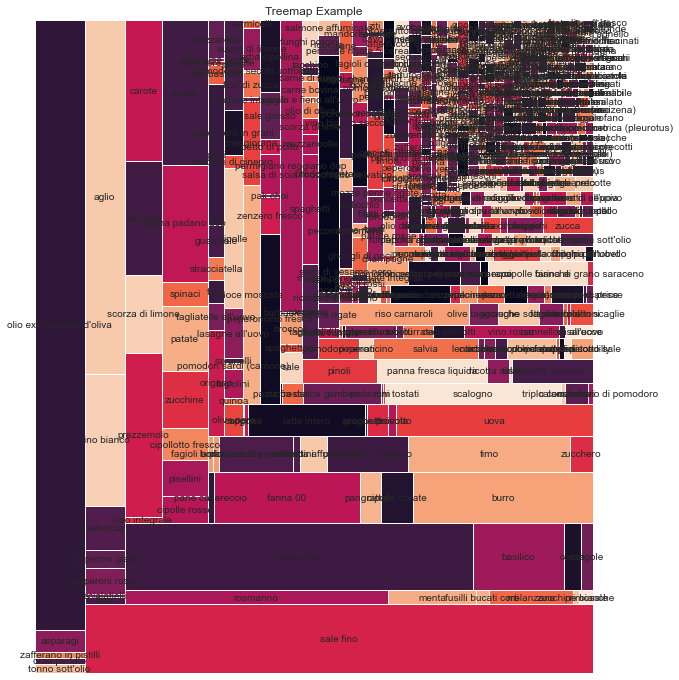

In [38]:
sizes = c.values()

# Labels for each rectangle (optional)
labels = c.keys()

# Colors for rectangles (optional)
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create treemap
plt.figure(figsize=(10, 12))
squarify.plot(sizes=sizes, label=labels, 
              #color='blue', 
             # alpha=0.7
             )
plt.axis('off')  # Remove axis
plt.title("Treemap Example")
plt.show()

#plt.savefig('treemap.jpg')

## Base + companatico

In [53]:
# Primi piatti - rileggi per sicurezza 

l_titles = [k for k in d_rec if d_rec[k]['category']=='Primi piatti']
l_ingrs = [d_rec[k]['ingredients'] for k in d_rec 
           if d_rec[k]['category']=='Primi piatti'
          ]

d_primi = {
          'Pasta + carne + pesce': 0, 'Riso + carne + pesce': 0,
          'Pasta + veg': 0, 'Pasta + carne': 0, 'Pasta + pesce': 0,
          'Riso + veg': 0, 'Riso + carne': 0, 'Riso + pesce': 0,
          'Far/cer + veg': 0, 'Far/cer + carne': 0, 'Far/cer + pesce': 0,
          'Veg': 0, 'Else': 0
          }

for i in range(len(l_titles)):
    title_ingrs = [item[0] for item in l_ingrs[i]]
    
    pasta = set(title_ingrs) & set(l_pasta) != set()
    riso = set(title_ingrs) & set(l_riso) != set()
    far_cer = set(title_ingrs) & set(l_farine) != set()
    gnocchi = set(title_ingrs) & set(l_gnocchi) != set()
    
    veg = set(title_ingrs) & set(l_verdure) != set()
    carne = set(title_ingrs) & set(l_carne) != set()
    pesce = set(title_ingrs) & set(l_pesce) != set()
    
    # carne e pesce assieme - o pasta o riso
    if pasta and carne and pesce:
        d_primi['Pasta + carne + pesce'] += 1
        #print(l_titles[i])
    elif riso and carne and pesce:
        d_primi['Riso + carne + pesce'] += 1
        print(l_titles[i])
    
    # pasta e uno degli altri - veg puo' essere un terzo ingred 
    elif pasta and carne:
        d_primi['Pasta + carne'] += 1
        #print(l_titles[i])
    elif pasta and pesce:
        d_primi['Pasta + pesce'] += 1
        #print(l_titles[i])
    elif pasta and veg:   # solo pasta e veg senza carne o pesce
        d_primi['Pasta + veg'] += 1
        #print(l_titles[i])

    # stessa cosa per riso e resto
    elif riso and carne:
        d_primi['Riso + carne'] += 1
        #print(l_titles[i])
    elif riso and pesce:
        d_primi['Riso + pesce'] += 1 
#        print(l_titles[i])
    elif riso and veg:
        d_primi['Riso + veg'] += 1 
        #print(l_titles[i])
        
    elif (far_cer and carne) or (gnocchi and carne):
        d_primi['Far/cer + carne'] += 1
        #print(l_titles[i])
    elif (far_cer and pesce) or (gnocchi & pesce):
        d_primi['Far/cer + pesce'] += 1    
        #print(l_titles[i])
    elif (far_cer and veg) or (gnocchi & veg):
        d_primi['Far/cer + veg'] += 1
        #print(l_titles[i])
        
    # veg only - vellutate, minestre
    elif veg: 
        d_primi['Veg'] += 1
        #print(l_titles[i])
        
    # il resto - shoudl be small
    # sono ricette su come fare la pasta (da sola)
    # o pasta/riso con sole spezie o soli condimenti 
    # o pasta con solo formaggio
    else:
        d_primi['Else'] += 1
        #print(l_titles[i])

insalata_di_riso
insalata_di_riso_basmati_e_rosso_e_cubetti_di_pancetta_dolce
risotto_alla_milanese_con_gambero_viola


In [695]:
d_primi

{'Pasta + carne + pesce': 6,
 'Riso + carne + pesce': 3,
 'Pasta + veg': 271,
 'Pasta + carne': 219,
 'Pasta + pesce': 248,
 'Riso + veg': 112,
 'Riso + carne': 53,
 'Riso + pesce': 53,
 'Far/cer + veg': 189,
 'Far/cer + carne': 95,
 'Far/cer + pesce': 64,
 'Veg': 57,
 'Else': 52}

In [122]:
len(l_titles), sum(d_primi.values())

NameError: name 'd_primi' is not defined

<Figure size 720x864 with 0 Axes>

<AxesSubplot:>

(0.0, 100.0, 0.0, 100.0)

Text(0.5, 1.0, 'Treemap Example')

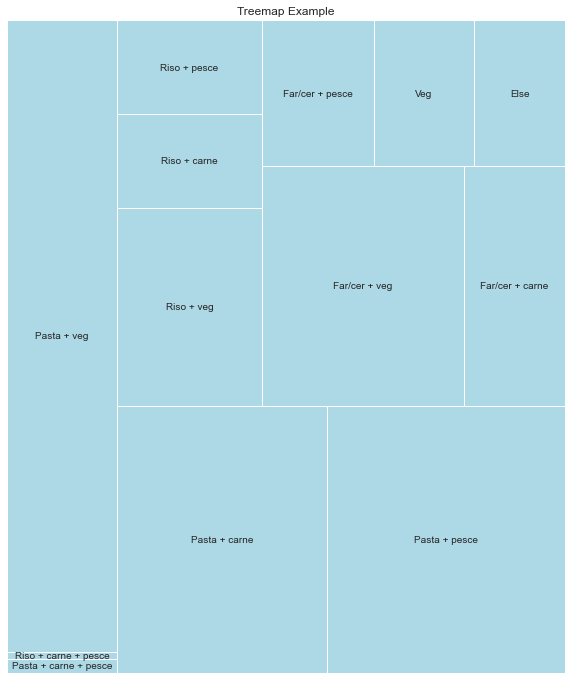

In [692]:
sizes = d_primi.values()

# Labels for each rectangle (optional)
labels = d_primi.keys()

# Colors for rectangles (optional)
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create treemap
plt.figure(figsize=(10, 12))
squarify.plot(sizes=sizes, label=labels, 
              color='lightblue', 
             # alpha=0.7
             )
plt.axis('off')  # Remove axis
plt.title("Treemap Example")
#plt.show()

plt.savefig('treemap.jpg')

In [120]:
len(l_pasta), len(l_riso), len(l_gnocchi), len(l_farine)
len(l_verdure), len(l_formaggi)
len(l_carne), len(l_pesce)
len(l_erbe), len(l_spezie)
len(l_farine), len(l_semi), len(l_condimenti)
len(l_bevande), len(l_uova)
len(l_dolci), len(l_dairy_vegan)

(119, 14, 3, 53)

(248, 83)

(72, 70)

(24, 47)

(53, 8, 41)

(28, 4)

(13, 13)

<Figure size 720x864 with 0 Axes>

<AxesSubplot:>

(0.0, 100.0, 0.0, 100.0)

Text(0.5, 1.0, 'Treemap Example')

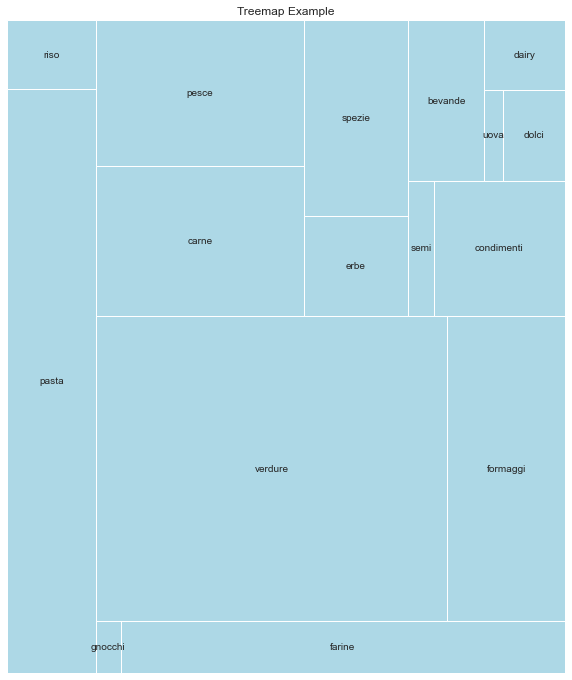

In [135]:
sizes = [len(l_pasta), len(l_riso), len(l_gnocchi), len(l_farine),
len(l_verdure), len(l_formaggi),
len(l_carne), len(l_pesce),
len(l_erbe), len(l_spezie),
len(l_semi), len(l_condimenti),
len(l_bevande), len(l_uova),
len(l_dolci), len(l_dairy_vegan)]

# Labels for each rectangle (optional)
labels = ['pasta', 'riso', 'gnocchi', 'farine','verdure','formaggi','carne', 'pesce','erbe', 
          'spezie','semi', 'condimenti','bevande', 'uova', 'dolci', 'dairy']
          

# Colors for rectangles (optional)
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create treemap
plt.figure(figsize=(10, 12))
squarify.plot(sizes=sizes, label=labels, 
              color='lightblue', 
             # alpha=0.7
             )
plt.axis('off')  # Remove axis
plt.title("Treemap Example")
plt.show()

#plt.savefig('treemap.jpg')

In [134]:
d = d_farine
for k in d:
    print(k, len(d[k]))

cereali 11
farine 25
pane e affini 17


<Figure size 720x864 with 0 Axes>

<AxesSubplot:>

(0.0, 100.0, 0.0, 100.0)

Text(0.5, 1.0, 'Treemap Example')

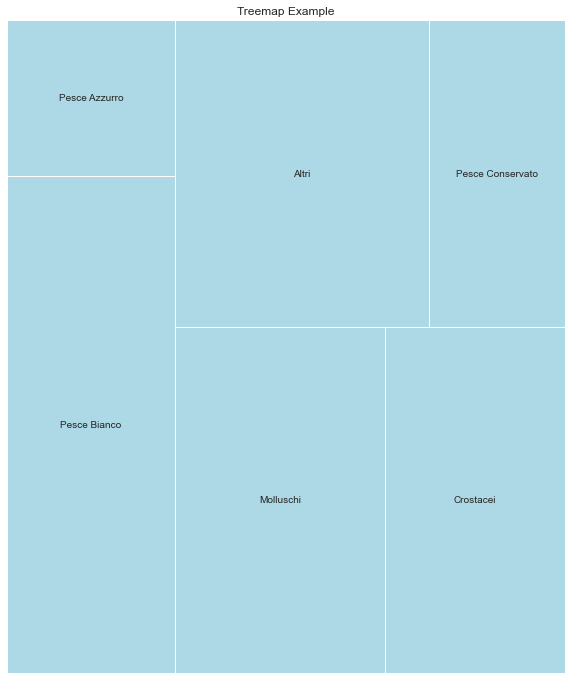

In [146]:
d= d_pesce

sizes = [len(d[k]) for k in d]

# Labels for each rectangle (optional)
labels = d.keys()
          

# Colors for rectangles (optional)
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create treemap
plt.figure(figsize=(10, 12))
squarify.plot(sizes=sizes, label=labels, 
              color='lightblue', 
             # alpha=0.7
             )
plt.axis('off')  # Remove axis
plt.title("Treemap Example")
plt.show()

#plt.savefig('treemap.jpg')